### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

In [64]:
import numpy as np
import pandas as pd

df = pd.read_csv('./data/ecommerce_sales_data.csv')

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [65]:
    # 1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.

print(df.head(5))

   OrderID Product     Category  Quantity  Price  CustomerID   Birthdate  \
0        1     역사책        Books         5  37000        1071  1980-08-08   
1        2      셔츠     Clothing         5  20000        1526  1967-08-09   
2        3     노트북  Electronics         4   8000        1252  1973-04-07   
3        4     자전거       Sports         1   8000        1670  1970-04-08   
4        5     헤드폰  Electronics         3  26000        1838  1992-05-19   

          OrderDate Country  DiscountRate  
0  2024-06-10 17:18      미국          0.14  
1  2023-11-18 18:45      독일          0.29  
2  2023-10-15 11:19      중국          0.23  
3   2024-07-19 2:19      일본          0.20  
4  2024-01-20 20:34    대한민국          0.09  


In [66]:
    # 2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.

discountrate_mean = df['DiscountRate'].mean().round(2)
print(discountrate_mean)            # 평균값 0.17

discountrate_median = df['DiscountRate'].median().round(2)
print(discountrate_median)          # 중앙값 0.2

# 평균값과 중앙값의 차이가 10%가 넘게 나므로, 중앙값으로 처리

df['DiscountRate'].fillna(discountrate_median, inplace=True)    # 원본데이터 변경 완료
df.info()                           # 중앙값으로 처리 완료

0.17
0.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       120 non-null    int64  
 1   Product       120 non-null    object 
 2   Category      120 non-null    object 
 3   Quantity      120 non-null    int64  
 4   Price         120 non-null    int64  
 5   CustomerID    120 non-null    int64  
 6   Birthdate     120 non-null    object 
 7   OrderDate     120 non-null    object 
 8   Country       120 non-null    object 
 9   DiscountRate  120 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 9.5+ KB


C:\Users\Playdata\AppData\Local\Temp\ipykernel_14992\1771747119.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DiscountRate'].fillna(discountrate_median, inplace=True)    # 원본데이터 변경 완료


In [67]:
    # 3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

# df.info()       # 7번 row를 dtype-object에서 dtype-datetime으로 변환해야함

df['OrderDate'] = pd.to_datetime(df['OrderDate'])   # to_datetime으로 형식변환

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderID       120 non-null    int64         
 1   Product       120 non-null    object        
 2   Category      120 non-null    object        
 3   Quantity      120 non-null    int64         
 4   Price         120 non-null    int64         
 5   CustomerID    120 non-null    int64         
 6   Birthdate     120 non-null    object        
 7   OrderDate     120 non-null    datetime64[ns]
 8   Country       120 non-null    object        
 9   DiscountRate  120 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 9.5+ KB


2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

In [68]:
    # 1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
    #     - 매출액 = `Quantity` * `Price`

df['TotalRevenue'] = df['Quantity'] * df['Price']   # 새로운 column 생성

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderID       120 non-null    int64         
 1   Product       120 non-null    object        
 2   Category      120 non-null    object        
 3   Quantity      120 non-null    int64         
 4   Price         120 non-null    int64         
 5   CustomerID    120 non-null    int64         
 6   Birthdate     120 non-null    object        
 7   OrderDate     120 non-null    datetime64[ns]
 8   Country       120 non-null    object        
 9   DiscountRate  120 non-null    float64       
 10  TotalRevenue  120 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 10.4+ KB


OrderDate
2023-10     392000
2023-11     995000
2023-12     920000
2024-01     905000
2024-02     565000
2024-03     703000
2024-04     288000
2024-05     930000
2024-06    1365000
2024-07     712000
2024-08     635000
2024-09     319000
2024-10     190000
Freq: M, Name: TotalRevenue, dtype: int64


C:\Users\Playdata\AppData\Local\Temp\ipykernel_14992\2392272199.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.set_index('OrderDate').resample('M')['TotalRevenue'].sum()


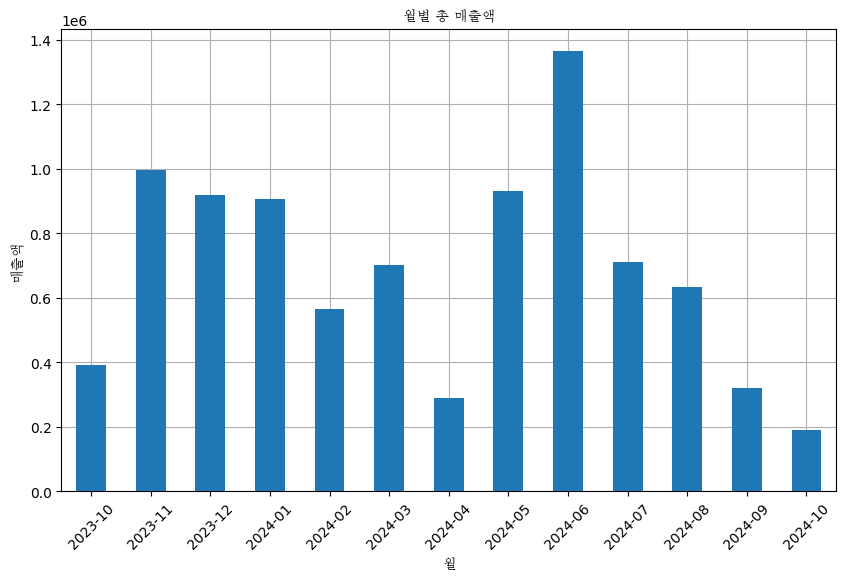

In [69]:
    # 2. 월별 총 매출액을 집계하여 시각화하세요.
    #     - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = 'C:/Windows/Fonts/batang.ttc'           # 한글 안보여서 한글폰트 적용

font_prop = fm.FontProperties(fname=font_path)

monthly_revenue = df.set_index('OrderDate').resample('M')['TotalRevenue'].sum()
monthly_revenue.index = monthly_revenue.index.to_period('M')    # 월별 변환
print(monthly_revenue)                      # 월별 총 매출액

plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar', zorder=5)
plt.title('월별 총 매출액', fontproperties=font_prop)
plt.xlabel('월', fontproperties=font_prop)
plt.ylabel('매출액', fontproperties=font_prop)
plt.xticks(rotation=45)
plt.grid(zorder=1)
plt.show()

In [70]:
    # 3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.

category_totalrevenue = df.groupby('Category')['TotalRevenue'].sum()
category_top_three = category_totalrevenue.sort_values(ascending=False).head(3)
print(category_top_three)

Category
Food           1966000
Electronics    1746000
Beauty         1493000
Name: TotalRevenue, dtype: int64


In [71]:
    # 4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

country_totalrevenue = df.groupby('Country')['TotalRevenue'].sum()
country_top_five = country_totalrevenue.sort_values(ascending=False).head(5)
print(country_top_five)

Country
미국      2238000
독일      1973000
중국      1766000
일본      1523000
대한민국    1419000
Name: TotalRevenue, dtype: int64


3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [72]:
    # 1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.

customerid_totalrevenue = df.groupby('CustomerID')['TotalRevenue'].sum()
customer_top_five = customerid_totalrevenue.sort_values(ascending=False).head(5)
print(customer_top_five)

CustomerID
1007    334000
1354    245000
1141    241000
1589    215000
1632    192000
Name: TotalRevenue, dtype: int64


In [73]:
    # 2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.

customerid_quantity = df.groupby('CustomerID')['Quantity'].sum()
customer_top_five_second = customerid_quantity.sort_values(ascending=False).head(5)
print(customer_top_five_second)

CustomerID
1007    8
1278    7
1421    7
1141    6
1071    5
Name: Quantity, dtype: int64


In [74]:
    # 3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
    #    - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

# df['Birthdate'].sort_values()   # 63년생부터 04년생까지 있음

# df.info()       # object type

df['Birthdate'] = pd.to_datetime(df['Birthdate'])   # datetime으로 형변환
df['BirthYear'] = df['Birthdate'].dt.year   # 출생년도 추출

def devide_generation(year):    # 이전 한국나이 기준으로 나눔
     if year < 1967:
         return '60대'
     elif year < 1977:
         return '50대'
     elif year < 1987:
         return '40대'
     elif year < 1997:
         return '30대'
     else:
         return '20대'
     
df['Generation'] = df['BirthYear'].apply(devide_generation)     # 세대별 나눔
category_twenty = df[df['Generation'] == '20대'].sort_values(by='Quantity', ascending=False).head(1)
print(f'20대 카테고리: {category_twenty['Category']}')
category_thirty = df[df['Generation'] == '30대'].sort_values(by='Quantity', ascending=False).head(1)
print(f'30대 카테고리: {category_thirty['Category']}')
category_fourty = df[df['Generation'] == '40대'].sort_values(by='Quantity', ascending=False).head(1)
print(f'40대 카테고리: {category_fourty['Category']}')
category_fifty = df[df['Generation'] == '50대'].sort_values(by='Quantity', ascending=False).head(1)
print(f'50대 카테고리: {category_fifty['Category']}')
category_sixty = df[df['Generation'] == '60대'].sort_values(by='Quantity', ascending=False).head(1)
print(f'60대 카테고리: {category_sixty['Category']}')

20대 카테고리: 103    Food
Name: Category, dtype: object
30대 카테고리: 10    Books
Name: Category, dtype: object
40대 카테고리: 0    Books
Name: Category, dtype: object
50대 카테고리: 1    Clothing
Name: Category, dtype: object
60대 카테고리: 105    Beauty
Name: Category, dtype: object


4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [75]:
    # 1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.

product_quantity = df.groupby('Product')['Quantity'].sum()
product_quantity_five = product_quantity.sort_values(ascending=False).head(5)

print(product_quantity_five)

Product
셔츠     25
립스틱    22
소설     21
커피     20
역사책    20
Name: Quantity, dtype: int64


In [76]:
    # 2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.

category_product = df.groupby(['Category', 'Product'])['Quantity'].sum()    # 카테고리별 상품별 판매량
category_product_sorted = category_product.sort_values(ascending=False)     # 카테고리별 상품별 판매량 높은 순
category_product_sorted.groupby('Category').head(1)                         # 카테고리별 가장 많이 판매된 상품

Category     Product
Clothing     셔츠         25
Beauty       립스틱        22
Books        소설         21
Food         커피         20
Electronics  노트북        15
Sports       요가매트       12
Name: Quantity, dtype: int64

In [77]:
    # 3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

# df.info()

product_quantity_mean = df.groupby('Product')['Quantity'].mean()
product_quantity_mean_sorted = product_quantity_mean.sort_values(ascending=False).head(3)
product_quantity_mean_sorted

Product
주스      5.0
자기계발    5.0
요가매트    4.0
Name: Quantity, dtype: float64

5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

OrderDate
2023-10-02/2023-10-08     60000
2023-10-09/2023-10-15     32000
2023-10-16/2023-10-22    248000
2023-10-23/2023-10-29     52000
2023-10-30/2023-11-05    380000
2023-11-06/2023-11-12    194000
2023-11-13/2023-11-19    346000
2023-11-20/2023-11-26     30000
2023-11-27/2023-12-03     45000
2023-12-04/2023-12-10    176000
2023-12-11/2023-12-17     84000
2023-12-18/2023-12-24     72000
2023-12-25/2023-12-31    588000
2024-01-01/2024-01-07    177000
2024-01-08/2024-01-14    185000
2024-01-15/2024-01-21    470000
2024-01-22/2024-01-28     73000
2024-01-29/2024-02-04         0
2024-02-05/2024-02-11         0
2024-02-12/2024-02-18    139000
2024-02-19/2024-02-25    361000
2024-02-26/2024-03-03    397000
2024-03-04/2024-03-10         0
2024-03-11/2024-03-17    186000
2024-03-18/2024-03-24     46000
2024-03-25/2024-03-31    139000
2024-04-01/2024-04-07    109000
2024-04-08/2024-04-14         0
2024-04-15/2024-04-21    132000
2024-04-22/2024-04-28         0
2024-04-29/2024-05-05    33600

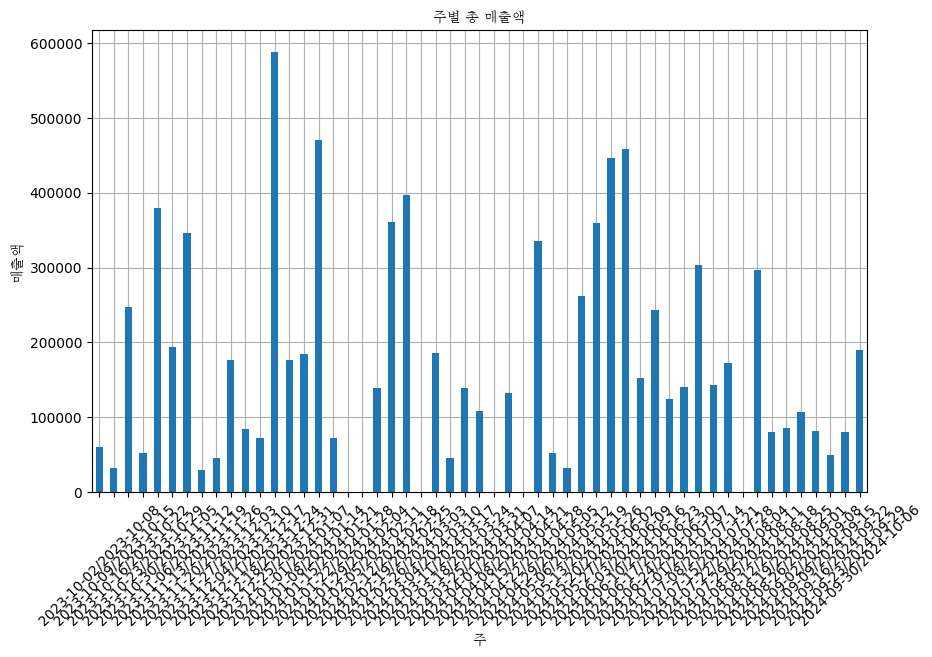

In [78]:
    # 1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.

# df.info()

weekly_revenue = df.set_index('OrderDate').resample('W')['TotalRevenue'].sum()
weekly_revenue.index = weekly_revenue.index.to_period('W')    # 주별 변환
print(weekly_revenue)                      # 주별 총 매출액

plt.figure(figsize=(10, 6))
weekly_revenue.plot(kind='bar', zorder=5)
plt.title('주별 총 매출액', fontproperties=font_prop)
plt.xlabel('주', fontproperties=font_prop)
plt.ylabel('매출액', fontproperties=font_prop)
plt.xticks(rotation=45)
plt.grid(zorder=1)
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_14992\4163275031.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  period_revenue = df_sorted.loc[start_date:end_date]['TotalRevenue'].resample('M').sum()


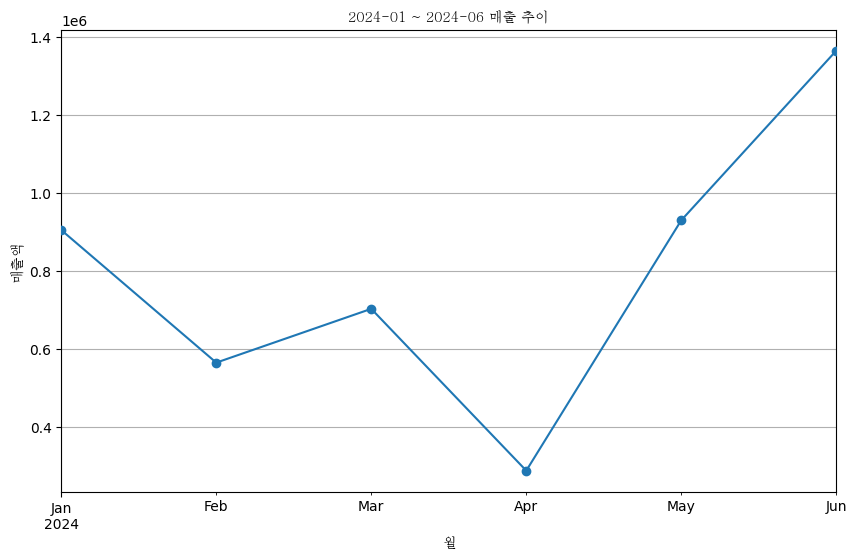

In [84]:
    # 2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.

# df.info()

start_date = '2024-01'
end_date = '2024-06'

df_sorted = df.set_index('OrderDate').sort_index()

period_revenue = df_sorted.loc[start_date:end_date]['TotalRevenue'].resample('M').sum()
period_revenue.index = period_revenue.index.to_period('M')

plt.figure(figsize=(10, 6))
period_revenue.plot(kind='line', marker='o', zorder=5)
plt.title(f'{start_date} ~ {end_date} 매출 추이', fontproperties=font_prop)
plt.xlabel('월', fontproperties=font_prop)
plt.ylabel('매출액', fontproperties=font_prop)
plt.xticks()
plt.grid(zorder=1)
plt.show()

In [80]:
    # 3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

In [81]:
    # 1. 고객의 **재구매율**을 분석하세요.
    #     - 재구매율 = 한 고객이 여러 번 주문한 비율

In [82]:
    # 2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

In [ ]:
'''

죄송합니다 아파서 더 하기 힘들것 같습니다....

'''